# Gaussian Process
1. A Gaussian process defines a probability distribution over functions. <br/> <br/>
2. Gaussian process can also be seen as an infinite dimensional generalization of multivariate Gaussian distribution. <br/> <br/>
3. To define a Gaussian process, we need the following two functions:
  1. **Mean Function: **$\mu: \mathbb{R}^d \rightarrow \mathbb{R}$
  2. **Covariance Function: **$k: \mathbb{R}^{d \times d} \rightarrow \mathbb{R}$ <br/> <br/>
4. The covariance function is a kernel function that should satisfy the usual properties that are imposed on a kernel function. <br/> <br/>
5. If we assume that the mean function is zero everywhere, then the Gaussian process is completely defined by the covariance function - **Intuitive explanation** for how a covariance function gives preference to certain types of functions over other functions <br/> <br/>
6. Gaussian process as a prior distribution over functions in Bayesian framework.Its a property of Bayesian Statistics that if the Prior and Likelihood both are Gaussian then Posterior would as well will be Gaussian.

### Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 200 # Number of data points to generate
k = 3 # Number of samples per kernel
d = 1 # Dimensionality of input data

def calculate_K(x, kernel_type='rbf'):
    kernels = {
        'rbf': rbf_kernel,
        'linear': linear_kernel,
        'constant': constant_kernel,
        'periodic': periodic_kernel,
    }
    return kernels[kernel_type](x)

In [2]:
def rbf_kernel(x):
    sigma = 1
    temp = np.expand_dims(x, 0).repeat(m, axis=0) # m x m x n
    temp2 = temp.transpose((1, 0, 2)) # m x m x n
    diff = temp - temp2 
    return np.exp(-(np.square(temp - temp2).sum(axis=2)) / (2*sigma**2))

def linear_kernel(x):
    return np.matmul(x, x.T)

def constant_kernel(x):
    return 5*np.ones((m, m))

def periodic_kernel(x):
    sigma = 1
    temp = np.expand_dims(x, 0).repeat(m, axis=0) # m x m x n
    temp2 = temp.transpose((1, 0, 2)) # m x m x n
    diff = (temp - temp2).sum(axis=2) # m x m
    return np.exp(-2*np.square(np.sin(diff/2)) / (sigma**2))

### RBF Kernel

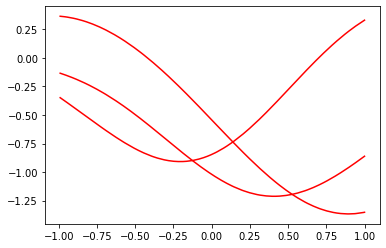

In [3]:
# Plot samples for RBF kernel
x = np.random.uniform(low=-1, high=1, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mew = np.zeros((m, 1)) # Calculate mew for the joint y distribution
sigma = calculate_K(x) # Calculate sigma for joint y distribution
y = np.random.multivariate_normal(mew.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x, y[i, :], 'r-')
plt.show()

### Linear Kernel

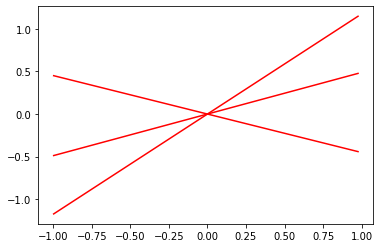

In [4]:
# Plot samples for linear kernel
x = np.random.uniform(low=-1, high=1, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mew = np.zeros((m, 1)) 
sigma = calculate_K(x, kernel_type='linear') 
y = np.random.multivariate_normal(mew.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x, y[i, :], 'r-')
plt.show()

### Constant Kernel

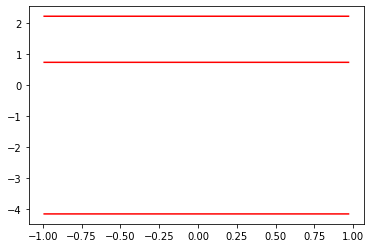

In [5]:
# Plot samples for constant kernel
k=3
x = np.random.uniform(low=-1, high=1, size=(m, d))
x = np.sort(x, axis=0)
mew = np.zeros((m, 1))
sigma = calculate_K(x, kernel_type='constant') 
y = np.random.multivariate_normal(mew.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x, y[i, :], 'r-')
plt.show()

### Periodic Kernel

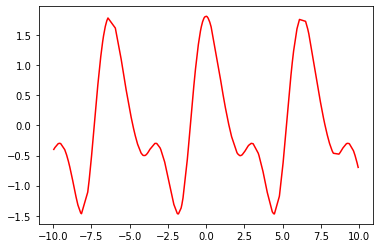

In [6]:
k=1 # making k=3 makes the visualisation messy.
# Plot samples for periodic kernel
x = np.random.uniform(low=-10, high=10, size=(m, d)) 
x = np.sort(x, axis=0)
mew = np.zeros((m, 1))
sigma = calculate_K(x, kernel_type='periodic') 
y = np.random.multivariate_normal(mew.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x.squeeze(), y[i, :].squeeze(), 'r-')
plt.show()

## Gaussian Process Regression


We define a Gaussian process prior over the functions $f$. Let $\mathbf{t} = \{t^{(i)}\}_{i=1}^{m}$, since we have defined a Gaussian process prior over the functions $f$, we get:$$p(\mathbf{t}) = \mathcal{N}(0, K)$$for the Gram matrix $K$ obtained using some kernel function $k: \mathbb{R}^{d \times d} \rightarrow \mathbb{R}$. The function $k$ takes as input two examples $x^{(i)}$ and $x^{(j)}$ and returns a measure of covariance between the supposed true output $t^{(i)}$ and $t^{(j)}$.

## Gaussian Process Regression - Step by Step Implementation
We will now implement the Gaussian process regression step by step.

In [206]:
m = 1000 # Number of training examples
n = 3 # Number of features to use

### Defining the feature function $\phi(x)$ (the prior)

In [207]:
def calculate_phi(x):
    # Returns:phi: (m, n) feature matrix having n features for m trainig samples.
    m = x.shape[0]
    phi = np.zeros((m, n))
    for i in range(1, n+1):
        phi[:, i-1] = x**i
    return phi

### Defining the true and corrupted output function

In [208]:
def output(x):
    """
        Returns:
            y: (m,) vector containing output corrupted by noise
            t: (m,) vector containing uncorrupted output
    """
    w = np.expand_dims(np.asarray([4.0, 1.53, -2.3]), axis=1)
    phi = calculate_phi(x)
    t = np.matmul(phi, w)
    y = t + np.random.normal(loc=0, scale=np.sqrt(1/beta), size=t.shape)
    return (y, t)

### Defining the Kernel function

In [209]:
def linear_kernel(x):
    phi = calculate_phi(x)
    return np.matmul(phi, phi.T)

def rbf_kernel(x):
    phi = calculate_phi(x)
    sigma = 0.25
    temp = np.expand_dims(phi, 0).repeat(m, axis=0)
    temp2 = temp.transpose((1, 0, 2))
    diff = temp - temp2 
    return np.exp(-(np.square(temp - temp2).sum(axis=2)) / (2*sigma**2))
    
def calculate_K(x, kernel_type='rbf'):
    kernels = {
        'rbf': rbf_kernel,
        'linear': linear_kernel
    }
    return kernels[kernel_type](x)

### Using Linear Kernel

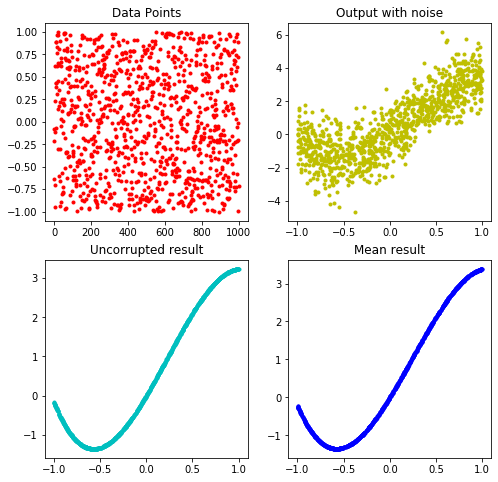

<Figure size 432x288 with 0 Axes>

In [211]:
# Generate m data points
x = np.random.uniform(low=-1, high=1, size=(m,))
(y, t) = output(x)

# Calculate the Gram matrix
K = calculate_K(x, kernel_type='linear')
K_inv = np.linalg.inv(K + 0.001*np.eye(m))

# Calculate predictive distribution

# Similarly one can also find  𝑝(𝐭|𝐲)  as:
# 𝑝(𝐭|𝐲)=N(𝐭|𝛽(𝐾(inv)+𝛽*𝐼)(inv)*𝑦,(𝐾(inv)+𝛽*𝐼)inv)  (𝛽=1)

mew = np.matmul(np.linalg.inv(K_inv + np.eye(m)), y.reshape((m, 1)))
sigma = np.linalg.inv(K_inv + np.eye(m))

fig = plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.title('Data Points')
plt.plot(x, 'r.')

plt.subplot(2, 2, 2)
plt.title('Output with noise')
plt.plot(x, y, 'y.')

plt.subplot(2, 2, 3)
plt.title('Uncorrupted result')
plt.plot(x, t,'c.')

plt.subplot(2, 2, 4)
plt.title('Mean result')
plt.plot(x, mew, 'b.')

plt.show()
plt.tight_layout()

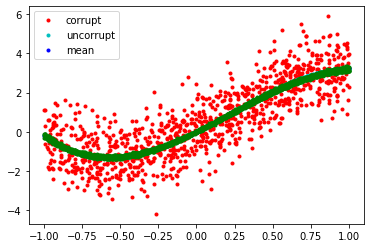

In [176]:
# Plot the data points
plt.plot(x, y, 'r.',label='corrupt')

# Plot the true output
plt.plot(x, t, 'c.',label='uncorrupt')

# Plot the MAP estimate
plt.plot(x, mew, 'b.',label='mean')

# Plot 3 other samples
for i in range(3):
    t_samples = np.random.multivariate_normal(mew.flatten(), sigma)
    plt.plot(x, t_samples, 'g.')
plt.legend(loc='best')